# **Step 1: KIỂM TRA VÀ PHÂN TÍCH DỮ LIỆU.**

In [ ]:
#Import Các thư viện cơ bản
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  #to plot graphs
sns.set()  #setting seaborn as default 

import plotly.express as px #contains functions that can create entire figures at once
from sklearn.cluster import KMeans #Thuật toán Kmeans.

#Loading Dataset
dataset = pd.read_csv("/content/Mall_Customers.csv")

#Dataset.
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
# describing the data
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# checking if there is any NULL data
dataset.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

=> DỮ LIỆU KHÔNG BỊ MẤT HAY MANG GIÁ TRỊ NULL.


# **STEP 2: TRỰC QUAN HÓA DỮ LIỆU TỪNG THUỘC TÍNH.**


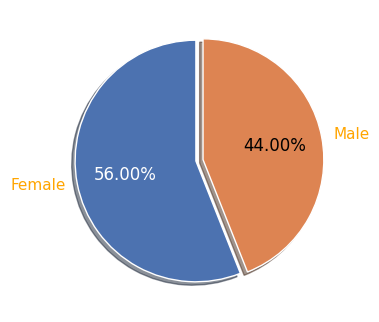

In [ ]:
# 1: Gender Analysis

values = dataset['Gender'].value_counts()
labels = ['Female', 'Male']

fig, ax = plt.subplots(figsize = (4, 4), dpi = 100)
explode = (0, 0.06)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'orange')
plt.setp(autotexts, size = 12, color = 'white')
autotexts[1].set_color('black')
plt.show()

Điều thú vị là Nữ giới dẫn đầu với tỷ lệ 56% trong khi Nam giới chiếm 44%, đó là một khoảng cách tương đối, đặc biệt khi dân số của Nam giới tương đối cao hơn Nữ giới.
Nhưng trong bài toán phân khúc khách hàng ty lệ này rất khó để thực hiện Modle => Không sử dụng thuộc tính này.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



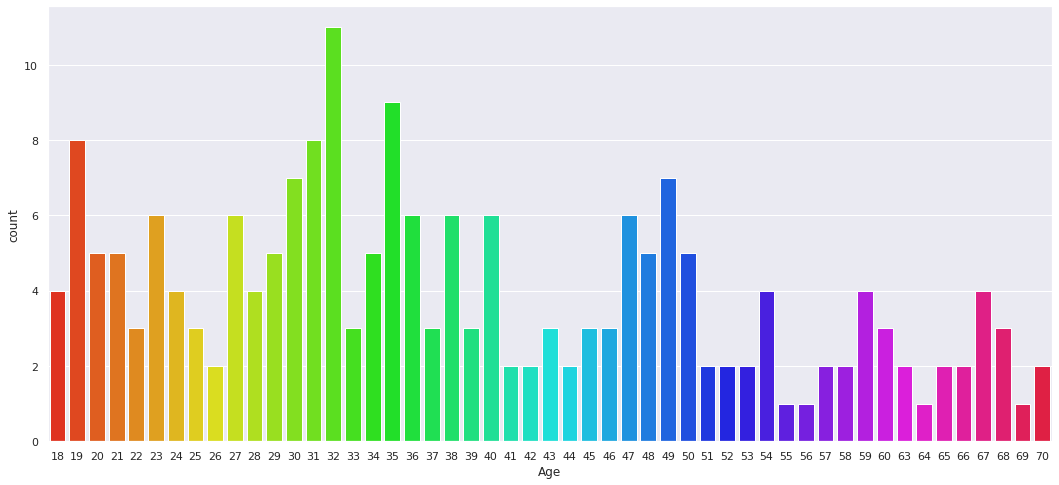

In [ ]:
# 2: Age Analysis
plt.figure(figsize = (18,8))
sns.countplot(dataset['Age'], palette = 'hsv')

Nhìn có vẽ khó hình dùng. Cho nên chúng ta sẽ chia nhỏ từng phân khúc độ tuổi và kiểm tra thử.


In [ ]:
age_18_25 = dataset.Age[(dataset.Age >= 18) & (dataset.Age <= 25)]
age_26_35 = dataset.Age[(dataset.Age >= 26) & (dataset.Age <= 35)]
age_36_45 = dataset.Age[(dataset.Age >= 36) & (dataset.Age <= 45)]
age_46_55 = dataset.Age[(dataset.Age >= 46) & (dataset.Age <= 55)]
age_55above = dataset.Age[dataset.Age >= 55]
x_age = ['18-25', '26-35', '36-45', '46-55', '55+']
y_age = [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values),
     len(age_55above.values)]

px.bar(data_frame = dataset, x = x_age, y = y_age, color = x_age,
       title = 'Number of customers per age group')

Từ 2 biểu đồ này hiển thị Biểu đồ tương tác hơn về sự phân bố của từng Nhóm tuổi trong Trung tâm mua sắm để làm rõ hơn về Nhóm tuổi của Khách truy cập trong Trung tâm mua sắm.
Bằng cách nhìn vào biểu đồ trên, có thể thấy rằng Độ tuổi từ 26 đến 35 là rất thường xuyên nhưng không có mô hình rõ ràng.Những người ở Tuổi 55, 56, 69, 64 rất ít thường xuyên đến Trung tâm mua sắm. Những người ở tuổi 32 là những người thường xuyên ghé thăm trung tâm mua sắm nhất.

In [ ]:
# 3: Annual Income Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



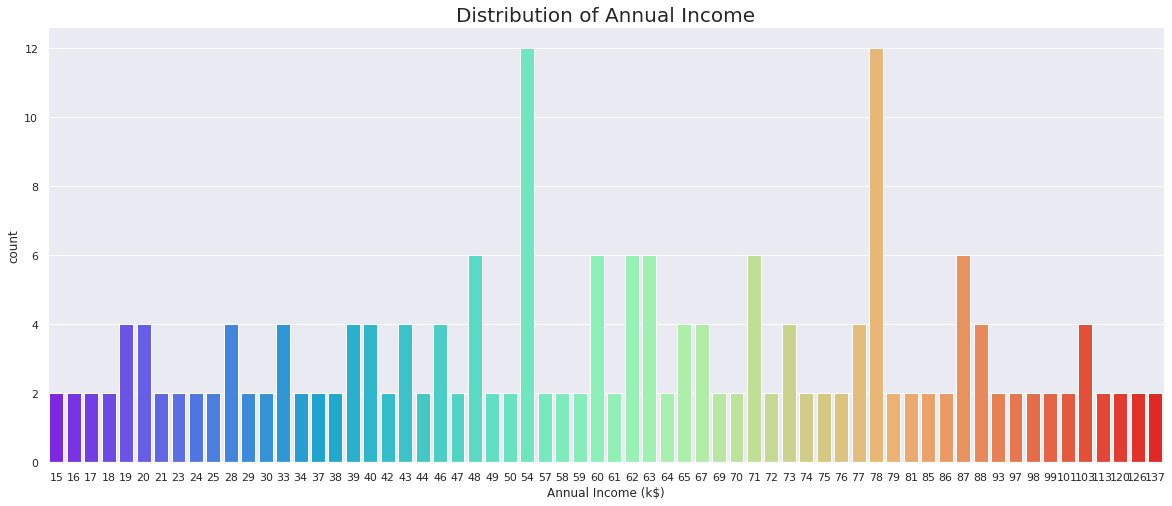

In [ ]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(dataset['Annual Income (k$)'], palette = 'rainbow')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.show()

Đây cũng là một biểu đồ để giải thích rõ hơn về Phân bổ của từng mức Thu nhập, Điều thú vị là có những khách hàng trong trung tâm mua sắm có tần suất hoạt động tương đương rất nhiều với Thu nhập hàng năm của họ từ 15 đô la Mỹ đến 137 nghìn đô la Mỹ. Có nhiều Khách hàng hơn trong Trung tâm mua sắm có Thu nhập hàng năm là 54 nghìn đô la Mỹ hoặc 78 đô la Mỹ.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



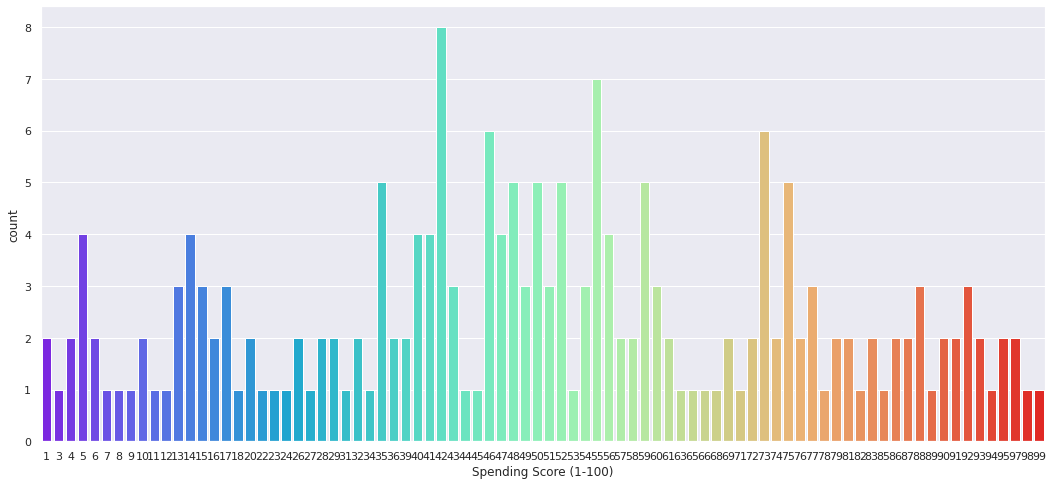

In [ ]:
# 4: Spending Score Distribution
plt.figure(figsize = (18,8))
sns.countplot(dataset['Spending Score (1-100)'], palette = 'rainbow')

Nhìn có vẻ rất khó để hình dung, chúng ta sẽ thử chia thành 5 cụm để phân tích.

In [ ]:
ss_1_20 = dataset['Spending Score (1-100)'][(dataset['Spending Score (1-100)'] >= 1) &
                                       (dataset['Spending Score (1-100)'] <= 20)]

ss_21_40 = dataset['Spending Score (1-100)'][(dataset['Spending Score (1-100)'] >= 21) &
                                       (dataset['Spending Score (1-100)'] <= 40)]

ss_41_60 = dataset['Spending Score (1-100)'][(dataset['Spending Score (1-100)'] >= 41) &
                                       (dataset['Spending Score (1-100)'] <= 60)]

ss_61_80 = dataset['Spending Score (1-100)'][(dataset['Spending Score (1-100)'] >= 61) &
                                       (dataset['Spending Score (1-100)'] <= 80)]

ss_81_100 = dataset['Spending Score (1-100)'][(dataset['Spending Score (1-100)'] >= 81) &
                                       (dataset['Spending Score (1-100)'] <= 100)]

x_ss = ['1-20', '21-40', '41-60', '61-80', '81-100']
y_ss = [len(ss_1_20.values), len(ss_21_40.values), len(ss_41_60.values), len(ss_61_80.values),
        len(ss_81_100.values)]

px.bar(data_frame = dataset, x = x_ss, y = y_ss, color = x_ss,
       title = 'Number of customers per Spending Score group')

Ở cấp độ chung, chúng tôi có thể kết luận rằng hầu hết Khách hàng có điểm chi tiêu của họ trong khoảng 40-60. Và phân bố khá đều ở các mức độ khác .
Đây là biểu đồ quan trọng nhất trong quan điểm của trung tâm mua sắm. **Vì đây là biểu đồ được xây dựng dưa trên sự quan sát và ghi chép của trung tâm mua sắm.Nó quyết định lớn đến doanh thu từ đó nó ảnh hưởng đến chiên lược tương lai của công ty => Thuộc tính tiêu biểu.**




# **STEP 3: TÌM CÁC THUỘC TÍNH TIÊU BIỂU.**

# *Chúng ta sẽ phân khúc theo các thuộc tính ở trên. Nhưng do thuộc tính Gender không thể hiện rõ mô hình. Cho nên chúng ta sẽ xây dựng dựa trên 3 thuộc tính.*


**Thuật đoán phân lớp đơn giản nhất được nghĩ đến à Kmean.**


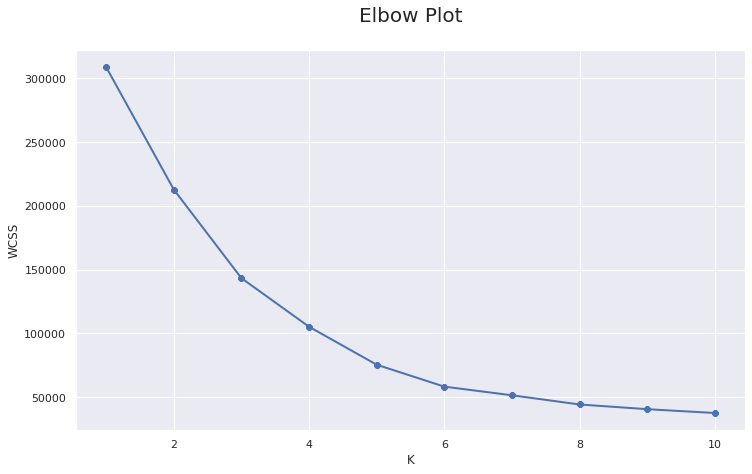

In [ ]:

X = dataset.iloc[:, 2:]

wcss= []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (12, 7))

plt.plot(range(1, 11), wcss, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

Khi đánh giá bằng đồ thị Elbow thì phân cụm gặp khó khăn trong việc xác định K.
Trong bài toán này K=6 là lựa chọn phù hợp nhất.


In [ ]:
# Các điểm dữ liệu sẽ được phân cụm dựa theo 3 thuộc tính.
kmeans = KMeans(n_clusters = 6)
clusters = kmeans.fit_predict(X)
X['Clusters'] = clusters
fig = px.scatter_3d(X, x="Annual Income (k$)", y="Spending Score (1-100)", z="Age",color = 'Clusters', size = 'Clusters')
fig.show()

Có thể thấy rằng khó mà chúng ta nhìn ra 6 phân cụm rõ ràng. Vì thế sử dụng 3 thuộc tính là không khả thi => Cần loại bớt một thuộc tính.


In [ ]:
# finding Correlation b/w features
dataset.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


Chúng ta sẽ củ thể hóa bằng biểu đồ trực quan hơn.


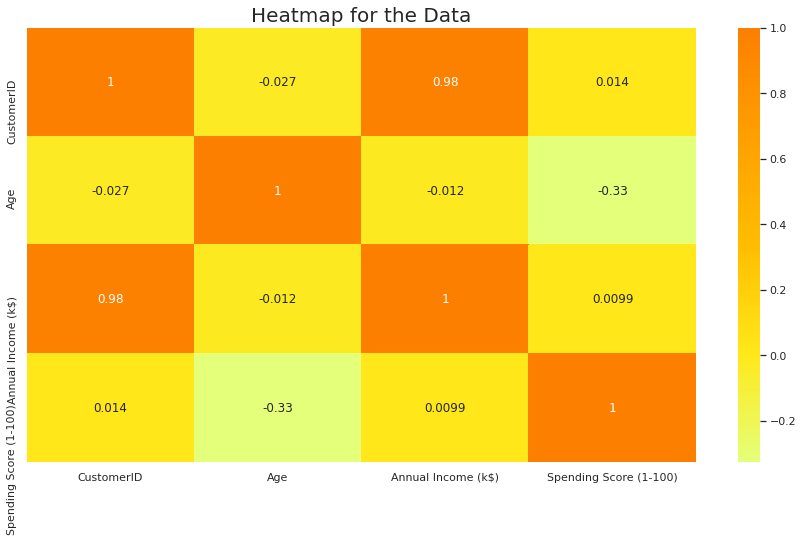

In [ ]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(dataset.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

Biểu đồ trên để hiển thị mối tương quan giữa các thuộc tính khác nhau của tập dữ liệu phân khúc khách hàng của trung tâm mua sắm, Bản đồ nhiệt này phản ánh các đối tượng tương quan nhất với màu cam và các đối tượng tương quan ít nhất với màu vàng. ở đây, phía trên biểu đồ, chúng ta có thể thấy rằng Thu nhập hàng năm có mối tương quan chặt chẽ với Điểm chi tiêu

Để chắc chắn chúng ta sẽ cụ thể qua dữ liệu các điểm thực tế trên hình vẽvẽ

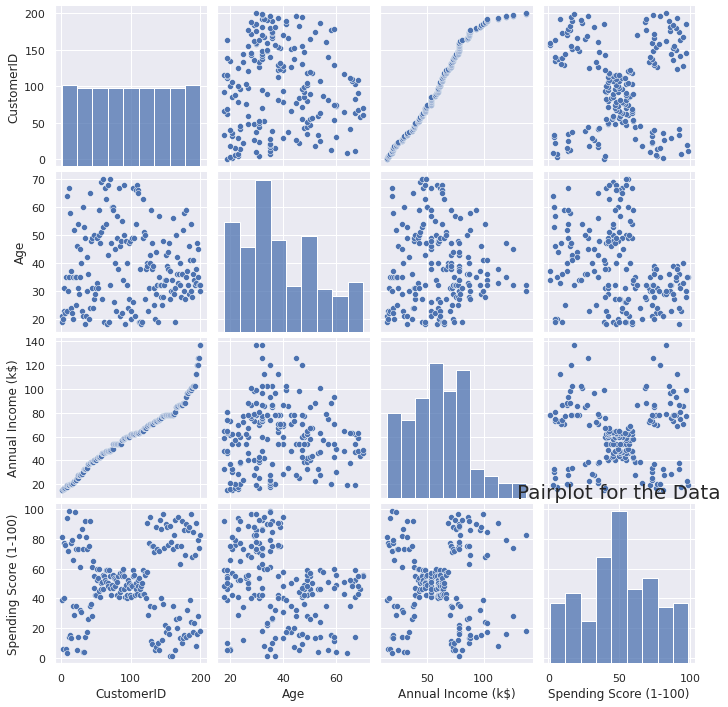

In [ ]:
sns.pairplot(dataset)
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

Dựa vào đồ thị phân bố các điểm thetheo các cặp thuộc tính ở trên. Chúng ta chỉ cần quan tâm đến 3 thuộc tính. Và rõ ràng chung ta có thể đưa ra nhận xét biểu đồ giữa tuổi và điểđiểm chi tiêu rất khó để phân lớp

***=> CHÚNG TA SẼ SỬ DỤNG 2 THUỘC TÍNH ĐÓ LÀ THU NHẬP HẰNG NĂM VÀ ĐIỂM CHI TIÊU ĐỂ ĐƯA VÀO THUẬT TOÁN PHỤC VỤ CHO VIỆC PHÂN KHÚC KHÁCH HÀNG.***


#  **STEP 4: XÂY DỰNG MÔ HÌNH PHÂN KHÚC KHÁCH HÀNG.**

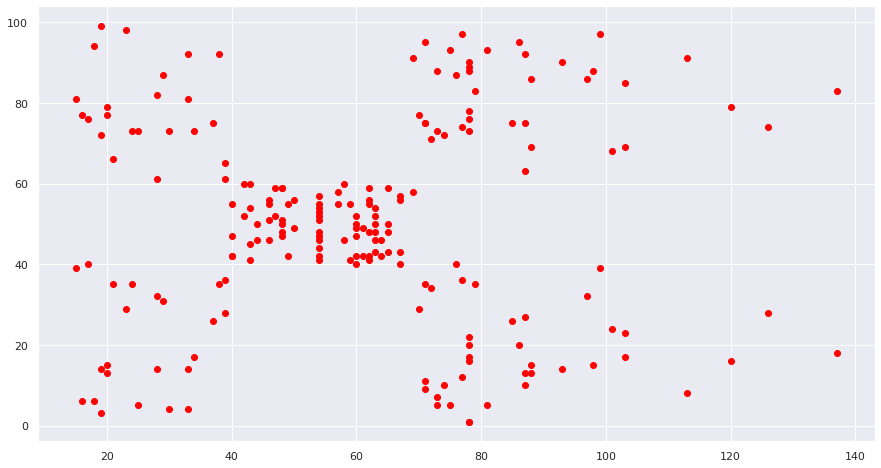

In [ ]:
# Giá trị đầu vào là 2 thuộc tính Annual Income (K$) và Spending Score
X = dataset.iloc[:, [3, 4]].values
plt.scatter(X[:, 0], X[:, 1], color = "red")
plt.show()

Để biết số lượng cụm tối ưu nhất . Ta sẽ sử dụng cả 2 phương pháp

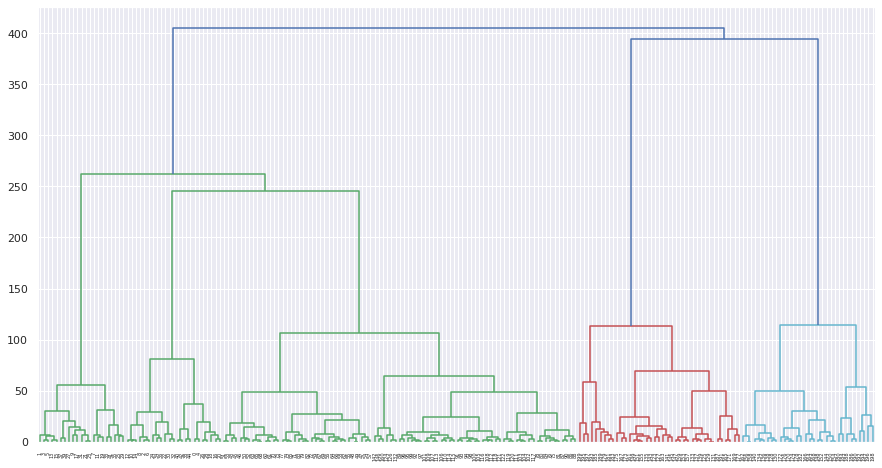

In [ ]:
import scipy
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(X,method='ward'))

Từ biểu đổ Dedrogam ta có thể chọn K bằng 3 hoặc bằng 5.


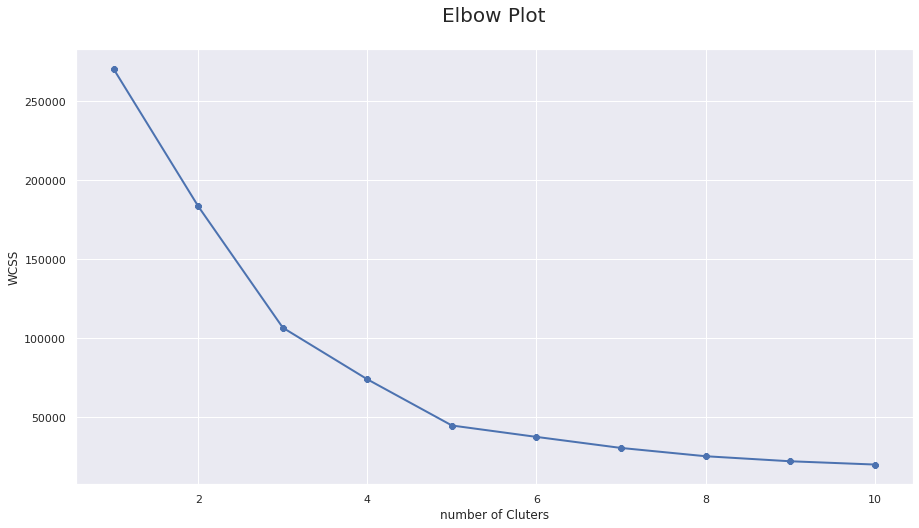

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++')
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('number of Cluters')
plt.ylabel('WCSS')
plt.show()

Từ đồ thị Elbow ta sẽ chọn k=5


***Huấn luyện mô hình.***

In [ ]:
kmeans = KMeans(n_clusters = 5, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
dataset["Cluster"]=y_kmeans + 1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning

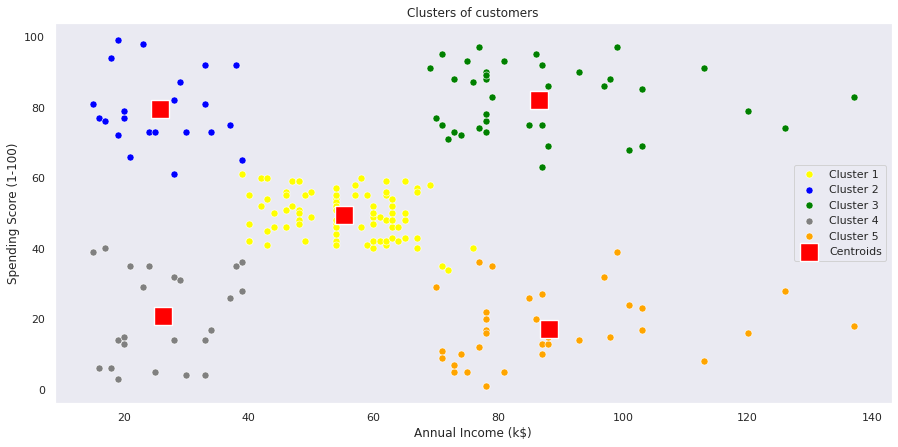

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
X_clusters = kmeans.cluster_centers_[:, 0]
Y_clusters = kmeans.cluster_centers_[:, 1]
plt.scatter(X_clusters, Y_clusters, s = 100, c = "yellow")
plt.show()

In [ ]:
#Lưu file csv mới
dataset["Cluster"]=y_kmeans + 1
dataset.to.csv("Cluter_Customer.csv")

#  **STEP 5: XÂY DỰNG MÔ HÌNH PHÂN DỰ BÁO KHÁCH HÀNG.**

In [ ]:
# Nhập file mới tạo để tiên hành huấn luyện.
# Load data
import pandas as pd
import numpy as np
dataset = pd.read_csv("/content/Cluster_Customers.csv")
dataset

,Unnamed: 0,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,1,Male,19,15,39,4
1,1,2,Male,21,15,81,2
2,2,3,Female,20,16,6,4
3,3,4,Female,23,16,77,2
4,4,5,Female,31,17,40,4
...,...,...,...,...,...,...,...
195,195,196,Female,35,120,79,3
196,196,197,Female,45,126,28,5
197,197,198,Male,32,126,74,3
198,198,199,Male,32,137,18,5


In [ ]:
# checking if there is any NULL data
dataset.isnull().any()

Unnamed: 0                False
CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
Cluster                   False
dtype: bool

In [ ]:
# Phân chia bộ dữ liệu
X = dataset.iloc[:, [3, 4]].values
Y = dataset.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =train_test_split(X, Y, train_size = 0.8, random_state = 0)

In [ ]:
# Huấn luyện với mô hình Naive Bayes.
from sklearn.naive_bayes import GaussianNB
classifier_1 = GaussianNB()
classifier_1.fit(X_train, Y_train)

# Huấn luyện với mô hình RamdomForest.
from sklearn.ensemble import RandomForestClassifier
classifier_2 = RandomForestClassifier(n_estimators = 10, criterion ='entropy', random_state = 0)
classifier_2.fit(X_train, Y_train)

# Huấn luyện với mô hình Kernel SVM.
from sklearn.svm import SVC
classifier_3 = SVC()
classifier_3.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Đánh giá với mô hình Naive Bayes.
from sklearn.metrics import accuracy_score
predic= classifier_1.predict(X_test)
score= accuracy_score(Y_test,predic)
score

0.825

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, classifier_1.predict(X_test))
cm

array([[11,  0,  0,  0,  0],
       [ 1,  4,  0,  0,  0],
       [ 1,  0,  9,  0,  0],
       [ 1,  2,  0,  3,  0],
       [ 1,  0,  1,  0,  6]])

In [ ]:
# Đánh giá với mô hình RamdomForest.
from sklearn.metrics import accuracy_score
predic= classifier_2.predict(X_test)
score= accuracy_score(Y_test,predic)
score

0.8

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, classifier_2.predict(X_test))
cm

array([[11,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0],
       [ 2,  0,  6,  0,  2],
       [ 0,  2,  0,  4,  0],
       [ 1,  0,  1,  0,  6]])

In [ ]:
# Đánh giá với mô hình Kernel SVM.
from sklearn.metrics import accuracy_score
predic= classifier_3.predict(X_test)
score= accuracy_score(Y_test,predic)
score

0.75

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, classifier_3.predict(X_test))
cm

array([[11,  0,  0,  0,  0],
       [ 1,  4,  0,  0,  0],
       [ 1,  0,  9,  0,  0],
       [ 1,  2,  0,  3,  0],
       [ 1,  0,  4,  0,  3]])

#  **STEP 6: DỰ BẢO MỘT KHÁCH HÀNG.**

In [ ]:
# Thử dự đoán 1 điểm dữ liệu mới.
ID=int(input("Nhap ID Cutomer: "))
Gender= input("Nhap gioi tinh khac hang : Male(Nam), FeMale(Nu) :")
Age= int(input("Nhap vao do tuoi khach hang: "))
Incom= int(input("Nhap vao thu nhap khach hang : "))
Core= int(input("Nhap vao diem danh gia chi tieu mua sam: "))


predic= classifier_2.predict([[Incom,Core]])
if predic == 1:
   print("=>Khac hang thuoc nhom 1 : Tieu chuan ") 
if predic == 2:
   print("=>Khac hang thuoc nhom 2 : Bat can") 
if predic == 3:
   print("=>Khac hang thuoc nhom 3 : Muc tieu ") 
if predic == 4:
   print("=>Khac hang thuoc nhom 4 : Hop ly ") 
if predic == 5:
   print("=>Khac hang thuoc nhom 5 : Can than ") 